In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


In [ ]:
df = pd.read_csv("/content/Mobile-Price-Prediction-cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [ ]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [ ]:
df.columns

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

In [ ]:
X = df.drop(columns = ["Price"])
y = df["Price"]

In [ ]:
print(df.isnull().sum())

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64


In [ ]:
# Define preprocessing for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),  # Adjust the number of components as needed
    ('regressor', Ridge())  # Change to your chosen model
])

model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.43663533636893204
Test Score: 0.4277453378319048


In [ ]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MAE: {mae_train}')
print(f'Training MSE: {mse_train}')
print(f'Training R²: {r2_train}')
print(f'Testing MAE: {mae_test}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R²: {r2_test}')

Training MAE: 9904.482437841067
Training MSE: 315661433.37510943
Training R²: 0.43663533636893204
Testing MAE: 9847.16949480603
Testing MSE: 241673140.4472942
Testing R²: 0.4277453378319048


In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define a dictionary of regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}


In [ ]:
results = []

for name, regressor in regressors.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('dim_reduction', PCA(n_components=5)),  # Adjust n_components as needed
        ('regressor', regressor)
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Store the results
    results.append({
        'Model': name,
        'Train MAE': mae_train,
        'Train MSE': mse_train,
        'Train R²': r2_train,
        'Test MAE': mae_test,
        'Test MSE': mse_test,
        'Test R²': r2_test
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                       Model     Train MAE     Train MSE  Train R²  \
0          Linear Regression   9907.580107  3.156612e+08  0.436636   
1           Ridge Regression   9904.482438  3.156614e+08  0.436635   
2           Lasso Regression   9907.228152  3.156612e+08  0.436636   
3              Decision Tree    140.963307  1.229908e+06  0.997805   
4              Random Forest   1181.696248  1.514072e+07  0.972978   
5  Support Vector Regression  13216.376798  7.158032e+08 -0.277502   

       Test MAE      Test MSE   Test R²  
0   9851.451515  2.417556e+08  0.427550  
1   9847.169495  2.416731e+08  0.427745  
2   9851.053728  2.417464e+08  0.427572  
3   2785.718004  6.822308e+07  0.838455  
4   3768.214388  8.698394e+07  0.794032  
5  13031.220584  5.756872e+08 -0.363162  


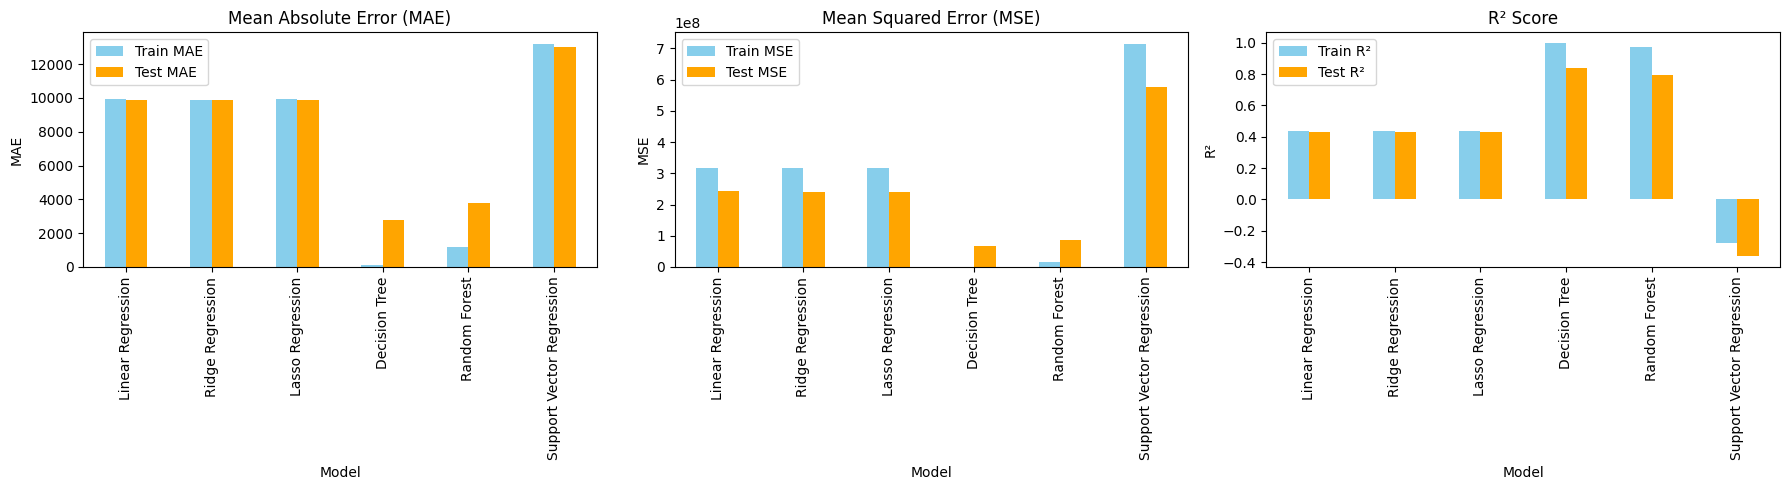

In [ ]:
# Optional: Plot the results for better visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# MAE Plot
results_df.plot(kind='bar', x='Model', y=['Train MAE', 'Test MAE'], ax=ax[0], color=['skyblue', 'orange'], legend=True)
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')

# MSE Plot
results_df.plot(kind='bar', x='Model', y=['Train MSE', 'Test MSE'], ax=ax[1], color=['skyblue', 'orange'], legend=True)
ax[1].set_title('Mean Squared Error (MSE)')
ax[1].set_ylabel('MSE')

# R² Plot
results_df.plot(kind='bar', x='Model', y=['Train R²', 'Test R²'], ax=ax[2], color=['skyblue', 'orange'], legend=True)
ax[2].set_title('R² Score')
ax[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Assuming X_test and y_test are pandas DataFrame or Series
# Randomly select 5 indices from the test set
random_indices = np.random.choice(len(X_test), size=5, replace=False)

# Extract the selected samples and their actual values using iloc
X_random_samples = X_test.iloc[random_indices]
y_random_actuals = y_test.iloc[random_indices]

# Initialize a dictionary to store predictions
predictions = {'Model': [], 'Predictions': [], 'Actuals': []}

for name, regressor in regressors.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('dim_reduction', PCA(n_components=5)),  # Adjust n_components as needed
        ('regressor', regressor)
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions for the random samples
    y_pred_random = model.predict(X_random_samples)

    # Store predictions
    predictions['Model'].append(name)
    predictions['Predictions'].append(y_pred_random)
    predictions['Actuals'].append(y_random_actuals.values)

# Convert predictions to DataFrame for better visualization
predictions_df = pd.DataFrame(predictions)
print(predictions_df)

# Optional: Display results in a more readable format
for i in range(len(predictions['Model'])):
    print(f"\nModel: {predictions['Model'][i]}")
    for j in range(5):
        print(f"Sample {j+1} - Predicted: {predictions['Predictions'][i][j]:.2f}, Actual: {predictions['Actuals'][i][j]:.2f}")


                       Model  \
0          Linear Regression   
1           Ridge Regression   
2           Lasso Regression   
3              Decision Tree   
4              Random Forest   
5  Support Vector Regression   

                                         Predictions  \
0  [8400.81278641681, -7087.0652852065505, -1629....   
1  [8405.597010963356, -7065.37416484335, -1610.4...   
2  [8401.02313300555, -7083.495214365525, -1627.5...   
3           [951.0, 799.0, 1089.0, 13999.0, 16990.0]   
4  [979.487047619048, 1227.172146103896, 1288.980...   
5  [1682.8811352296075, 1734.6761245083371, 1666....   

                          Actuals  
0  [985, 799, 1089, 13999, 16990]  
1  [985, 799, 1089, 13999, 16990]  
2  [985, 799, 1089, 13999, 16990]  
3  [985, 799, 1089, 13999, 16990]  
4  [985, 799, 1089, 13999, 16990]  
5  [985, 799, 1089, 13999, 16990]  

Model: Linear Regression
Sample 1 - Predicted: 8400.81, Actual: 985.00
Sample 2 - Predicted: -7087.07, Actual: 799.00
Sample 3 - 

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_test = torch.tensor(X_test.values).to(device)
y_test = torch.tensor(y_test.values).to(device)
X_train = torch.tensor(X_train.values).to(device)
y_train = torch.tensor(y_train.values).to(device)

In [ ]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

(torch.Size([162, 7]),
 torch.Size([162]),
 torch.Size([645, 7]),
 torch.Size([645]))

In [ ]:
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype)
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)
print("X_test shape:", X_test.shape, "dtype:", X_test.dtype)
print("y_test shape:", y_test.shape, "dtype:", y_test.dtype)


X_train shape: torch.Size([645, 7]) dtype: torch.float32
y_train shape: torch.Size([645]) dtype: torch.float32
X_test shape: torch.Size([162, 7]) dtype: torch.float32
y_test shape: torch.Size([162]) dtype: torch.float32


In [ ]:
X_train = X_train.float()  # Convert X_train to float32
y_train = y_train.float()  # Convert y_train to float32
X_test = X_test.float()    # Convert X_test to float32
y_test = y_test.float()    # Convert y_test to float32


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LargerRegressor(nn.Module):
    def __init__(self, input_size):
        super(LargerRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  # Further increased the number of neurons
        self.fc2 = nn.Linear(256, 128)         # Larger hidden layer
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)           # Added another layer
        self.fc6 = nn.Linear(16, 1)            # Final output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))               # ReLU activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of features (7 in this case)
model = LargerRegressor(input_size).to(device)

In [ ]:
import torch.optim as optim
loss_func = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr=0.001)

Epoch [0/10000], Loss: 764356416.0000
Epoch [1000/10000], Loss: 328666880.0000
Epoch [2000/10000], Loss: 262438096.0000
Epoch [3000/10000], Loss: 206120240.0000
Epoch [4000/10000], Loss: 184709744.0000
Epoch [5000/10000], Loss: 169966720.0000
Epoch [6000/10000], Loss: 154990704.0000
Epoch [7000/10000], Loss: 145983008.0000
Epoch [8000/10000], Loss: 130933184.0000
Epoch [9000/10000], Loss: 119898648.0000


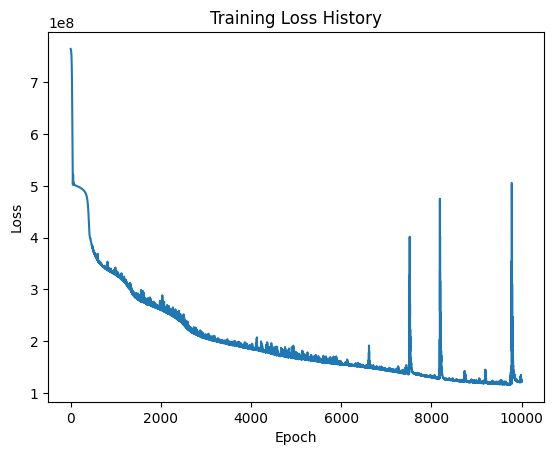

In [ ]:
num_epochs = 10000
loss_history = []

# Convert y_train and y_test to the correct shape (if necessary)
y_train = y_train.view(-1, 1).float().to(device)
y_test = y_test.view(-1, 1).float().to(device)

for epoch in range(num_epochs):
    model.train()


    # Forward pass
    predictions = model(X_train)
    loss = loss_func(predictions, y_train)

    # Backward pass and optimization
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Store the loss value
    loss_history.append(loss.item())

    # Print loss every 100 epochs
    if epoch % 1000 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

# Optional: Plot the loss history
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = loss_func(test_predictions, y_test)

    # Calculate additional metrics
    mae_test = torch.mean(torch.abs(test_predictions - y_test)).item()
    mse_test = test_loss.item()
    r2_test = 1 - mse_test / torch.var(y_test).item()

print(f"Test Data Metrics:\nMAE: {mae_test:.4f}\nMSE: {mse_test:.4f}\nR2 Score: {r2_test:.4f}")

Test Data Metrics:
MAE: 5822.8037
MSE: 100609104.0000
R2 Score: 0.7632


In [ ]:
model.eval()
with torch.no_grad():
    sample_idx = torch.randint(0, X_test.size(0), (5,))  # Randomly pick 5 samples
    sample_data = X_test[sample_idx]
    sample_predictions = model(sample_data).cpu().numpy()
    sample_actuals = y_test[sample_idx].cpu().numpy()

    print("\nSample Predictions vs Actuals:")
    for i in range(len(sample_idx)):
        print(f"Sample {i+1} - Predicted: {sample_predictions[i][0]:.2f}, Actual: {sample_actuals[i][0]:.2f}")


Sample Predictions vs Actuals:
Sample 1 - Predicted: 882.45, Actual: 639.00
Sample 2 - Predicted: 26043.61, Actual: 9999.00
Sample 3 - Predicted: 3697.69, Actual: 1049.00
Sample 4 - Predicted: 2133.74, Actual: 15000.00
Sample 5 - Predicted: 1877.00, Actual: 1349.00
